# Noa Pereira Prada Schnor

# Machine Learning and Statistics Module

# GMIT

This assessment concerns the well-known Boston House Prices dataset and the Python packages scipy, keras, and jupyter. The project consists in five sections: 1. Introduction of the Boston House Price Dataset; 2. Description - descriptive statistics and plots to describe the Boston House Price dataset; 3. Inference/Analysis - using inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t; 4. Prediction - using keras to create a neural network that can predict the median house price based on the other variables in the dataset and 5. Conclusions.

https://www.datacamp.com/community/tutorials/demystifying-crucial-statistics-python


1. Description of the Boston House Price Dataset

The dataset was first published in 1978 contains US census data concerning houses in various areas around the city of Boston. Each sample (row) corresponds to a unique area and has about 13 measures (variables/columns).

2. Descriptive

In [1]:
#import libraries
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.stats import mstats
from scipy.stats import kruskal

In [2]:
#Load the Boston Housing dataset from sklearn.datasets
df = load_boston()

In [3]:
# Description of the dataset
df.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [4]:
#Shape - visualization of the length and the breadth of the dataset
df.data.shape

(506, 13)

In [5]:
#Conversion to numpy array - target is the variable MEDV

df_bsn = pd.DataFrame(df.data,columns=df.feature_names)
df_bsn['target'] = pd.Series(df.target)

df_bsn = pd.DataFrame(df['data'], columns=df['feature_names'])
df_bsn['target'] = df['target']

In [6]:
#Checking missing data
df_bsn.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [7]:
#Check the first rows
df_bsn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Return a Numpy representation of the DataFrame
df_bsn.values

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          3.96900000e+02,   4.98000000e+00,   2.40000000e+01],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          3.96900000e+02,   9.14000000e+00,   2.16000000e+01],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          3.92830000e+02,   4.03000000e+00,   3.47000000e+01],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          3.96900000e+02,   5.64000000e+00,   2.39000000e+01],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          3.93450000e+02,   6.48000000e+00,   2.20000000e+01],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          3.96900000e+02,   7.88000000e+00,   1.19000000e+01]])

In [9]:
#Summary and description of the dataset to get a detailed statistical information for each column

df_bsn.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


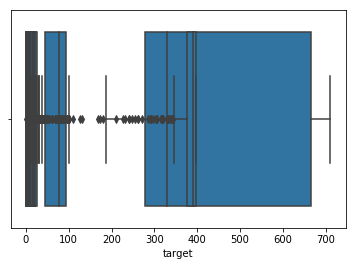

In [26]:
#Checking for outliers

sns.boxplot(x=df_bsn['CRIM'])
sns.boxplot(x=df_bsn['ZN'])
sns.boxplot(x=df_bsn['INDUS'])
sns.boxplot(x=df_bsn['NOX'])
sns.boxplot(x=df_bsn['RM'])
sns.boxplot(x=df_bsn['AGE'])
sns.boxplot(x=df_bsn['DIS'])
sns.boxplot(x=df_bsn['RAD'])
sns.boxplot(x=df_bsn['TAX'])
sns.boxplot(x=df_bsn['PTRATIO'])
sns.boxplot(x=df_bsn['B'])
sns.boxplot(x=df_bsn['LSTAT'])
sns.boxplot(x=df_bsn['target'])
plt.show()


In [10]:
#Split the input and the output variables

prices = df_bsn['target']
features = df_bsn.drop('target', axis = 1)

In [11]:
df_bsn.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


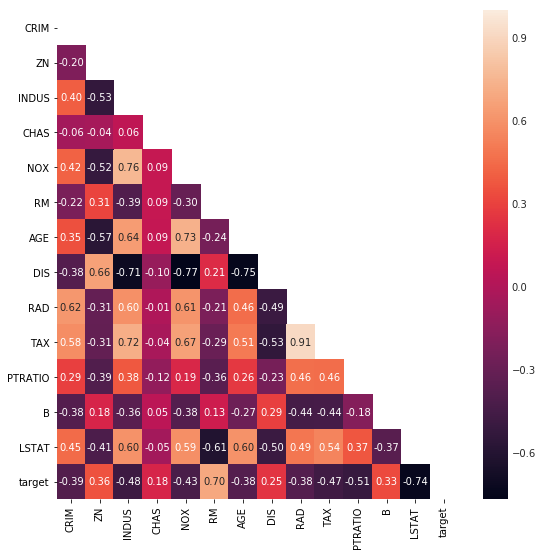

In [12]:
# Heatmap pf Pearson Correlation with no redundant mappings

corr = df_bsn.corr(method='pearson')
fig, ax = plt.subplots(figsize=(9, 9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
     ax = sns.heatmap(corr, annot=True, fmt=".2f", mask=mask)
plt.show()

From the Pearson Correlation the attributes LSTAT, RM, and PTRATIO seem to have good correlation with the variable price. These variables maybe can be considered when optimizing the predictive value for price.

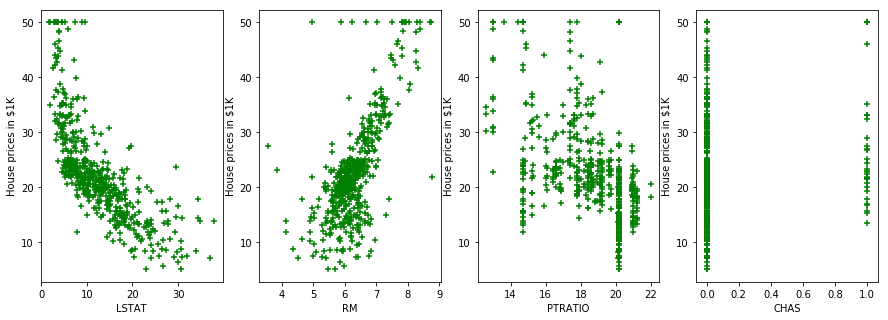

In [13]:
plt.figure(figsize=(15, 5))

attributes = ['LSTAT', 'RM', 'PTRATIO','CHAS']
price = df_bsn['target']

for i, col in enumerate(attributes):
    plt.subplot(1, len(attributes) , i+1)
    x = df_bsn[col]
    y = price
    plt.scatter(x, y, c='g', marker='+')
    plt.xlabel(col)
    plt.ylabel('House prices in $1K')

In [14]:
#Check the raking of all attributes using linear regression as a model

data = df["data"]
price = df["target"]
attributes = df["feature_names"]
 
linear = LinearRegression()


rfe = RFE(linear, n_features_to_select=1)
rfe.fit(data,price)
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), attributes))

[(1, 'NOX'),
 (2, 'RM'),
 (3, 'CHAS'),
 (4, 'PTRATIO'),
 (5, 'DIS'),
 (6, 'LSTAT'),
 (7, 'RAD'),
 (8, 'CRIM'),
 (9, 'INDUS'),
 (10, 'ZN'),
 (11, 'TAX'),
 (12, 'B'),
 (13, 'AGE')]

In [15]:
#Check number of areas that the land tract bounds Charles River
df_bsn['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

There are 35 neighborhoods on the Charles river.

In [16]:
#Setting the variable CHAS as an integer
df_bsn['CHAS'] = df_bsn['CHAS'].astype('int64')

In [17]:
#Confirming the type and size of each attribute
df_bsn.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [18]:
river = df_bsn[df_bsn['CHAS'] == 1.0]
noriver = df_bsn[df_bsn['CHAS'] == 0]
river.describe()
noriver.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,471.000000,471.000000,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3.723215,11.634820,11.019193,0.0,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461040,12.757941,22.093843
std,8.872172,23.617979,6.913850,0.0,0.113102,0.685895,28.458924,2.145567,8.748452,168.853790,2.155958,93.423542,7.169271,8.831362
min,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079640,0.000000,5.040000,0.0,0.448000,5.882000,42.500000,2.105250,4.000000,282.500000,17.400000,375.365000,7.160000,16.600000
50%,0.245220,0.000000,8.560000,0.0,0.538000,6.202000,76.500000,3.215700,5.000000,330.000000,19.100000,391.830000,11.380000,20.900000
75%,3.685665,12.500000,18.100000,0.0,0.624000,6.594000,94.100000,5.287300,24.000000,666.000000,20.200000,396.375000,17.095000,24.800000
max,88.976200,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Do the samples river and noriver have the same distribution? To get the answer it was performed the Mann Whitney U test and the Kruskal Wallis H test using scipy functions. These statistical tests are the the nonparametric version of the (paired) Student t-test.

In [19]:
#Mann Whitney U test or Wilcoxon-Mann Whitney test
scipy.stats.mannwhitneyu (river,noriver)

MannwhitneyuResult(statistic=-101839.5, pvalue=0.0)

The test results show that the samples are likely drawn from samples with differing distributions.

In [20]:
kruskal(river,noriver)

KruskalResult(statistic=305825.92964853218, pvalue=0.0)

In [21]:
river.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.302485,0.639325,NaN,0.624062,-0.062032,0.470851,-0.685555,0.862274,0.907911,0.493618,-0.207697,-0.018366,0.148031
ZN,-0.302485,1.000000,-0.580616,NaN,-0.465617,0.378319,-0.785229,0.661636,-0.327125,-0.405298,-0.259031,0.154006,-0.406272,0.371654
INDUS,0.639325,-0.580616,1.000000,NaN,0.845865,-0.200930,0.700080,-0.891876,0.490004,0.728635,0.057327,-0.347235,0.120242,-0.128543
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.624062,-0.465617,0.845865,NaN,1.000000,-0.280350,0.589547,-0.807297,0.482438,0.691302,-0.012994,-0.495887,0.256089,-0.361486
RM,-0.062032,0.378319,-0.200930,NaN,-0.280350,1.000000,-0.294243,0.212253,0.049545,0.000943,-0.116611,0.096858,-0.759602,0.629536
AGE,0.470851,-0.785229,0.700080,NaN,0.589547,-0.294243,1.000000,-0.776869,0.403889,0.541369,0.128481,-0.125676,0.394473,-0.221887
DIS,-0.685555,0.661636,-0.891876,NaN,-0.807297,0.212253,-0.776869,1.000000,-0.561426,-0.751410,-0.119082,0.338329,-0.126568,0.093800
RAD,0.862274,-0.327125,0.490004,NaN,0.482438,0.049545,0.403889,-0.561426,1.000000,0.943845,0.711803,-0.004580,-0.108858,0.103906
TAX,0.907911,-0.405298,0.728635,NaN,0.691302,0.000943,0.541369,-0.751410,0.943845,1.000000,0.538966,-0.152719,-0.073845,0.065748


In [22]:
noriver.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.202591,0.410235,NaN,0.434494,-0.227573,0.358745,-0.383584,0.627600,0.582175,0.284636,-0.378771,0.466218,-0.411852
ZN,-0.202591,1.000000,-0.530383,NaN,-0.523035,0.315498,-0.558844,0.665167,-0.311996,-0.311935,-0.408438,0.179080,-0.417086,0.377912
INDUS,0.410235,-0.530383,1.000000,NaN,0.760404,-0.418036,0.640433,-0.701800,0.603203,0.724997,0.415042,-0.362751,0.637824,-0.538610
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.434494,-0.523035,0.760404,NaN,1.000000,-0.316992,0.745631,-0.777587,0.628550,0.675029,0.222263,-0.387396,0.631182,-0.463440
RM,-0.227573,0.315498,-0.418036,NaN,-0.316992,1.000000,-0.249119,0.220013,-0.233465,-0.317361,-0.370255,0.127844,-0.602056,0.700861
AGE,0.358745,-0.558844,0.640433,NaN,0.745631,-0.249119,1.000000,-0.745673,0.461718,0.510884,0.283362,-0.284442,0.621968,-0.417367
DIS,-0.383584,0.665167,-0.701800,NaN,-0.777587,0.220013,-0.745673,1.000000,-0.497463,-0.535155,-0.254061,0.297205,-0.522648,0.288245
RAD,0.627600,-0.311996,0.603203,NaN,0.628550,-0.233465,0.461718,-0.497463,1.000000,0.908386,0.451227,-0.463876,0.527041,-0.433061
TAX,0.582175,-0.311935,0.724997,NaN,0.675029,-0.317361,0.510884,-0.535155,0.908386,1.000000,0.454856,-0.455034,0.583931,-0.522546


IndexError: too many indices for array